## AI & Machine Learning for Data Quality
**Description**: AI and machine learning can automate and enhance data quality checks by learning patterns and identifying anomalies more effectively than static rules.

**Task 1**: Training a model to predict and flag unusual trend patterns in sales data that
deviate from historical norms.

         date  sales
20 2025-01-21  400.0
70 2025-03-12   50.0


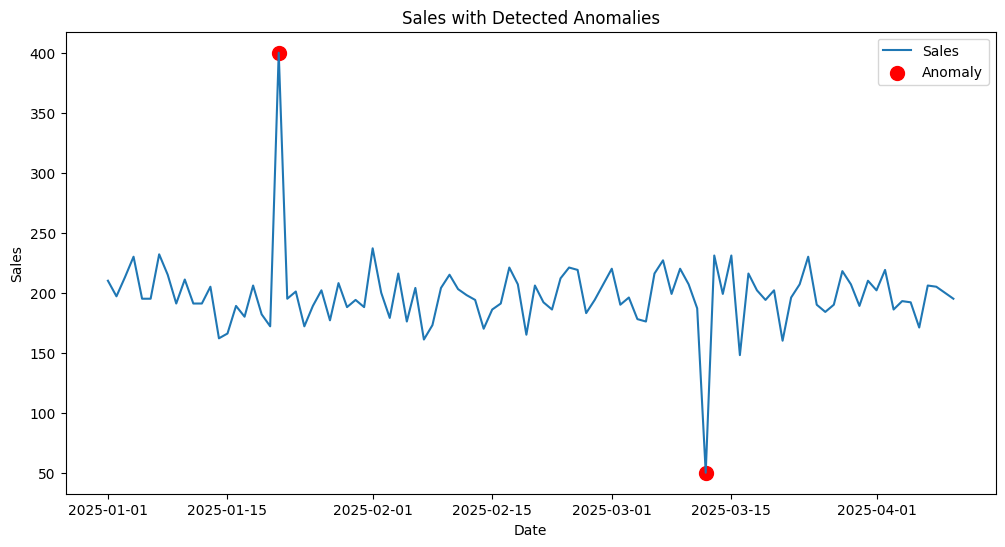

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Generate mock historical sales data (daily sales for 100 days)
np.random.seed(42)
dates = pd.date_range(start="2025-01-01", periods=100)
sales = np.random.normal(loc=200, scale=20, size=100).round()

# Inject anomalies (unusual spikes/dips)
sales[20] = 400  # spike
sales[70] = 50   # dip

df = pd.DataFrame({"date": dates, "sales": sales})

# Feature engineering: use sales and rolling mean as features
df["rolling_mean_7d"] = df["sales"].rolling(window=7, min_periods=1).mean()

features = df[["sales", "rolling_mean_7d"]]

# Train Isolation Forest for anomaly detection
model = IsolationForest(contamination=0.02, random_state=42)
model.fit(features)

# Predict anomalies: -1 means anomaly, 1 means normal
df["anomaly"] = model.predict(features)
df["anomaly_flag"] = df["anomaly"] == -1

# Print anomaly dates and sales
print(df[df["anomaly_flag"]][["date", "sales"]])

# Optional: visualize anomalies
plt.figure(figsize=(12,6))
plt.plot(df["date"], df["sales"], label="Sales")
plt.scatter(df.loc[df["anomaly_flag"], "date"], df.loc[df["anomaly_flag"], "sales"],
            color='red', label="Anomaly", s=100)
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales with Detected Anomalies")
plt.legend()
plt.show()

**Task 2**: Using clustering algorithms to detect duplicate records where entries are not
exactly identical.

In [2]:
# write your code from here
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import cosine_distances

# Sample data with near-duplicate records (e.g., customer names & addresses)
data = {
    "customer_id": [1, 2, 3, 4, 5],
    "name": [
        "John Doe",
        "Jon Doe",
        "Jane Smith",
        "Jane Smit",
        "Jake Johnson"
    ],
    "address": [
        "123 Maple St, Springfield",
        "123 Maple Street, Springfield",
        "456 Oak Ave, Shelbyville",
        "456 Oak Avenue, Shelbyville",
        "789 Pine Rd, Capital City"
    ],
}

df = pd.DataFrame(data)

# Combine name and address to form a single string for each record
df["combined"] = df["name"] + " " + df["address"]

# Vectorize text using TF-IDF to capture similarity
vectorizer = TfidfVectorizer().fit(df["combined"])
tfidf_matrix = vectorizer.transform(df["combined"])

# Compute cosine distances and cluster with DBSCAN
# eps is max distance for points to be neighbors, tune for sensitivity
clustering = DBSCAN(eps=0.3, min_samples=1, metric="cosine").fit(tfidf_matrix)

df["cluster_id"] = clustering.labels_

# Show clusters (potential duplicates grouped together)
print(df.sort_values("cluster_id")[["customer_id", "name", "address", "cluster_id"]])

   customer_id          name                        address  cluster_id
0            1      John Doe      123 Maple St, Springfield           0
1            2       Jon Doe  123 Maple Street, Springfield           1
2            3    Jane Smith       456 Oak Ave, Shelbyville           2
3            4     Jane Smit    456 Oak Avenue, Shelbyville           3
4            5  Jake Johnson      789 Pine Rd, Capital City           4


**Task 3**: Implementing classification models to validate data based on learned
characteristics from labeled datasets.

In [3]:
# write your code from here


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Mock labeled dataset: features extracted from data + label (0=valid, 1=invalid)
data = {
    "missing_value_count": [0, 2, 1, 4, 0, 3, 1, 0, 2, 1],
    "num_outliers": [0, 1, 0, 3, 0, 2, 0, 0, 1, 0],
    "avg_field_length": [10, 8, 9, 6, 11, 7, 9, 10, 8, 9],
    "label": [0, 1, 0, 1, 0, 1, 0, 0, 1, 0],
}

df = pd.DataFrame(data)

# Features and target
X = df.drop("label", axis=1)
y = df["label"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.3333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.33      0.50         3

    accuracy                           0.33         3
   macro avg       0.50      0.17      0.25         3
weighted avg       1.00      0.33      0.50         3



/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
